### Importing all the necessary libabires

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
df = pd.read_csv("gender_classification_v7.csv")
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
#checking the null value in the dataset
df.isnull().sum().max()

0

In [5]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
#Perform one-hot encoding on the categorical features
lb = preprocessing.LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
print(df['gender'].unique())

[1 0]


In [7]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [8]:
#Perform one-hot encoding 
df_dummies =pd.get_dummies(df)

In [9]:
df_dummies

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,0
4997,1,11.9,5.4,0,0,0,0,0
4998,1,12.9,5.7,0,0,0,0,0
4999,1,13.2,6.2,0,0,0,0,0


In [10]:
#checking the null value in dataset
df.isnull().sum().max()

0

In [11]:
df_dummies.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


In [12]:
df_dummies['gender'].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

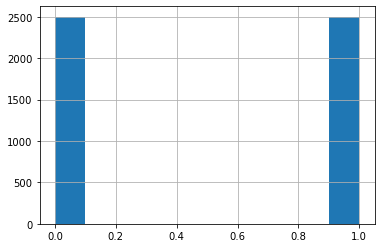

In [13]:
#Plot a histogram of the label
_ = df_dummies['gender'].hist()

In [131]:
def balance(seq):
    from collection import counter
    from numpy import log
    n = len(seq)
    classes =[(clas,float(count)) for clas,count in Counter(seq).item()]
    k = len(classes)
    H = -sum[(count/n)*log((count/n)) for clas, count in classes])
    return H/log(k)

SyntaxError: invalid syntax (Temp/ipykernel_15936/4216370493.py, line 7)

In [128]:
#checking the imbalanced in the dataset
df_dummies[df_dummies['gender']==1] ['gender'].count()/df_dummies["gender"].count()

0.5000999800039992

In [15]:
# grouped = df.groupby(df.gender)
# df_class_one = grouped.get_group(1)
# df_class_zero = grouped.get_group(0)
# print(df_class_one.shape,df_class_zero.shape)

In [16]:
# gender_grp = df_dummies.groupby(['gender'])
# df_dummies_one = gender_grp.get_group(1)
# df_dummies_zero = gender_grp.get_group(0)
# print(df_dummies_one.shape,df_dummies_zero.shape)

In [17]:
df_class_0 = df_dummies[df_dummies['gender'] == 0 ]
df_class_1 = df_dummies[df_dummies['gender'] == 1 ]

In [18]:
print(len(df_class_0),len(df_class_1))

2501 2500


### Applying downsampling technique to make dataset imbalanced

In [19]:

#65 % imbalance
new_df_class_0_low_imb= int(len(df_class_1)/65)*35
df_class_0_low_imb = df_class_0.sample(new_df_class_0_low_imb)
df_class_1_low_imb = df_class_1
#75% imbalance
new_df_class_0_mid_imb= int(len(df_class_1)/75)*25
df_class_0_mid_imb = df_class_0.sample(new_df_class_0_mid_imb)
df_class_1_mid_imb = df_class_1
#90% imbalance
new_df_class_0_high_imb= int(len(df_class_1)/90)*10
df_class_0_high_imb = df_class_0.sample(new_df_class_0_high_imb)
df_class_1_high_imb = df_class_1


In [20]:
print(len(df_class_0_low_imb),len(df_class_1))

1330 2500


In [21]:
print((len(df_class_0_low_imb)/(len(df_class_0_low_imb)+len(df_class_1)))*100)
print((len(df_class_1)/(len(df_class_0_low_imb)+len(df_class_1)))*100)

34.72584856396867
65.27415143603133


In [22]:
df_low_imbalanced = pd.concat([df_class_0_low_imb, df_class_1], axis=0)
df_mid_imbalanced = pd.concat([df_class_0_mid_imb, df_class_1], axis=0)
df_high_imbalanced = pd.concat([df_class_0_high_imb, df_class_1_high_imb], axis=0)

In [23]:
df_mid_imbalanced

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
3691,1,12.3,6.2,0,0,0,0,0
562,1,13.8,5.1,1,0,0,0,0
1191,1,14.2,6.5,0,0,1,0,0
3791,1,11.7,5.2,0,0,0,1,0
1851,0,13.6,5.4,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4987,1,12.1,6.2,1,1,1,1,1
4992,1,14.1,7.0,1,1,1,1,1
4994,1,12.9,7.0,1,1,1,1,1
4995,1,12.3,6.9,0,1,1,1,1


1    2500
0    1330
Name: gender, dtype: int64

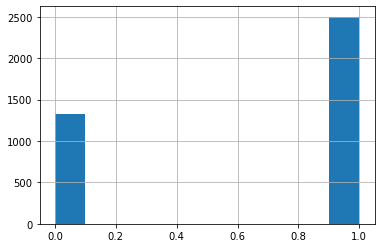

In [24]:
_ = df_low_imbalanced['gender'].hist()
df_low_imbalanced['gender'].value_counts()

1    2500
0     825
Name: gender, dtype: int64

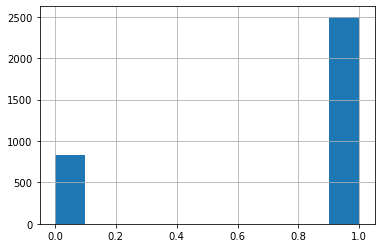

In [25]:
_ = df_mid_imbalanced['gender'].hist()
df_mid_imbalanced['gender'].value_counts()

1    2500
0     270
Name: gender, dtype: int64

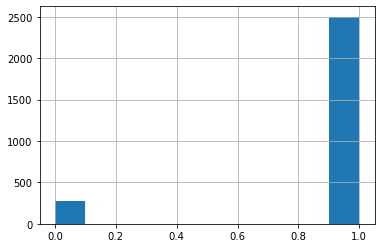

In [26]:
_ = df_high_imbalanced['gender'].hist()
df_high_imbalanced['gender'].value_counts()

### Establishing a baseline and performing stratified cross validatation on each of the datasets and thier surrogates 

In [27]:
# Allocating the features and labels of the dataset and their surrogates

features_df_dummies = df_dummies.drop('gender', axis=1)
labels_df_dummies = df_dummies['gender']


features_low_imb = df_low_imbalanced.drop('gender', axis=1)
labels_low_imb = df_low_imbalanced['gender']


features_mid_imb = df_mid_imbalanced.drop('gender', axis=1)
labels_mid_imb = df_mid_imbalanced['gender']


features_high_imb = df_high_imbalanced.drop('gender', axis=1)
labels_high_imb = df_high_imbalanced['gender']


Data_sets = [df_dummies, df_low_imbalanced, df_mid_imbalanced, df_high_imbalanced]



fold_no=0

from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.split(features_df_dummies,labels_df_dummies)
model =RandomForestClassifier()

for train_index, test_index in skf.split(features_df_dummies,labels_df_dummies):
    #print("Train:", train_index,"Validation:", test_index)
    #train_org_X, test_org_X = features_df_dummies.iloc[train_index], features_df_dummies.iloc[test_index]
    #train_org_Y, test_org_Y = labels_df_dummies.iloc[train_index], labels_df_dummies.iloc[test_index]
    
    train = df_dummies.iloc[train_index,:]
    test = df_dummies.iloc[test_index,:]
    
    
    train_org_X = train.drop(['gender'],axis=1)
    train_org_Y = train.gender
    test_org_X = test.drop(['gender'],axis=1)
    test_org_Y = test.gender
    model.fit(train_org_X, train_org_Y)
    score = model.score(test_org_X,test_org_Y)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
    
    
    fold_no += 1


fold_no=0

from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.split(features_low_imb,labels_low_imb)
model =RandomForestClassifier()

for train_index, test_index in skf.split(features_low_imb,labels_low_imb):
    
    train = df_low_imbalanced.iloc[train_index,:]
    test = df_low_imbalanced.iloc[test_index,:]
    
    
    trainX = train.drop(['gender'],axis=1)
    trainY = train.gender
    testX = test.drop(['gender'],axis=1)
    testY = test.gender
    model.fit(trainX, trainY)
    score = model.score(testX,testY)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
    
    
    fold_no += 1

    
fold_no=0

from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.split(features_mid_imb,labels_mid_imb)
model =RandomForestClassifier()

for train_index, test_index in skf.split(features_mid_imb,labels_mid_imb):
    #print("Train:", train_index,"Validation:", test_index)
    #train_org_X, test_org_X = features_df_dummies.iloc[train_index], features_df_dummies.iloc[test_index]
    #train_org_Y, test_org_Y = labels_df_dummies.iloc[train_index], labels_df_dummies.iloc[test_index]
    
    train = df_dummies.iloc[train_index,:]
    test = df_dummies.iloc[test_index,:]
    
    
    trainA = train.drop(['gender'],axis=1)
    trainB = train.gender
    testA = test.drop(['gender'],axis=1)
    testB = test.gender
    model.fit(trainA, trainB)
    score = model.score(testA,testB)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
    
    
    fold_no += 1

    
    
fold_no=0

from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf = StratifiedKFold(n_splits=10, random_state=None)
skf.split(features_df_dummies,labels_df_dummies)
model =RandomForestClassifier()

for train_index, test_index in skf.split(features_high_imb,labels_high_imb):
    #print("Train:", train_index,"Validation:", test_index)
    #train_org_X, test_org_X = features_df_dummies.iloc[train_index], features_df_dummies.iloc[test_index]
    #train_org_Y, test_org_Y = labels_df_dummies.iloc[train_index], labels_df_dummies.iloc[test_index]
    
    train = df_dummies.iloc[train_index,:]
    test = df_dummies.iloc[test_index,:]
    
    
    trainC = train.drop(['gender'],axis=1)
    trainD = train.gender
    testC = test.drop(['gender'],axis=1)
    testD = test.gender
    model.fit(trainC, trainD)
    score = model.score(testC,testD)
    print('For Fold {} the accuracy is {}'.format(str(fold_no),score))
    
    
    fold_no += 1

    
    









For Fold 0 the accuracy is 0.9520958083832335
For Fold 1 the accuracy is 0.966
For Fold 2 the accuracy is 0.976
For Fold 3 the accuracy is 0.96
For Fold 4 the accuracy is 0.98
For Fold 5 the accuracy is 0.976
For Fold 6 the accuracy is 0.968
For Fold 7 the accuracy is 0.97
For Fold 8 the accuracy is 0.978
For Fold 9 the accuracy is 0.978
For Fold 0 the accuracy is 0.9686684073107049
For Fold 1 the accuracy is 0.9712793733681462
For Fold 2 the accuracy is 0.9869451697127938
For Fold 3 the accuracy is 0.9660574412532638
For Fold 4 the accuracy is 0.9634464751958225
For Fold 5 the accuracy is 0.9765013054830287
For Fold 6 the accuracy is 0.9712793733681462
For Fold 7 the accuracy is 0.9660574412532638
For Fold 8 the accuracy is 0.9686684073107049
For Fold 9 the accuracy is 0.9738903394255874
For Fold 0 the accuracy is 0.954954954954955
For Fold 1 the accuracy is 0.978978978978979
For Fold 2 the accuracy is 0.9669669669669669
For Fold 3 the accuracy is 0.9579579579579579
For Fold 4 the acc

### Implementing Random forest to report the baseline rusult

In [28]:
#Random forest classifier 
classifier=RandomForestClassifier()
classifier.fit(train_org_X,train_org_Y)
classifier.fit(trainX,trainY)
classifier.fit(trainA,trainB)
classifier.fit(trainC,trainD)

# To mesure baseline result confusion matrix, accuracy scores,and classification report is generated for original dataset
pred_org_Y=classifier.predict(test_org_X)
print(confusion_matrix(test_org_Y,pred_org_Y))
print(accuracy_score(test_org_Y,pred_org_Y))
print(classification_report(test_org_Y,pred_org_Y))

# To mesure baseline result confusion matrix, accuracy scores,and classification report is generated for low-imbalance dataset
predY=classifier.predict(testX)
print(confusion_matrix(testY,predY))
print(accuracy_score(testY,predY))
print(classification_report(testY,predY))


# To mesure baseline result confusion matrix, accuracy scores,and classification report is generated for medium-imbalance dataset
predB=classifier.predict(testA)
print(confusion_matrix(testB,predB))
print(accuracy_score(testB,predB))
print(classification_report(testB,predB))


# To mesure baseline result confusion matrix, accuracy scores,and classification report is generated for high-imbalance dataset
predD=classifier.predict(testC)
print(confusion_matrix(testD,predD))
print(accuracy_score(testD,predD))
print(classification_report(testD,predD))


[[246   4]
 [  7 243]]
0.978
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       250
           1       0.98      0.97      0.98       250

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[130   3]
 [  7 243]]
0.9738903394255874
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       133
           1       0.99      0.97      0.98       250

    accuracy                           0.97       383
   macro avg       0.97      0.97      0.97       383
weighted avg       0.97      0.97      0.97       383

[[173   3]
 [  4 152]]
0.9789156626506024
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       176
           1       0.98      0.97      0.98       156

    accuracy                           0.98       332
   macro avg   

In [29]:
#Creating 10 stratifield fold

cv = KFold(n_splits=10, random_state=1, shuffle=True)

print(np.mean(cross_val_score(classifier, train_org_X, train_org_Y, cv = cv)))
print(np.mean(cross_val_score(classifier, trainX, trainY, cv = cv)))
print(np.mean(cross_val_score(classifier, trainA, trainB, cv = cv)))
print(np.mean(cross_val_score(classifier, trainC, trainD, cv = cv)))

0.9684483863020448
0.9712790697674419
0.9672564102564103
0.9667164658634538


### Elbow method for origianal dataset

In [30]:
#verifying the 9 fold data
print(train_org_X.shape)


(4501, 7)


In [31]:
import sklearn.cluster as cluster

K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(train_org_X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [32]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,11843.534837
1,2,7638.499222
2,3,6057.696939
3,4,4808.896801
4,5,4404.451736
5,6,4164.000982
6,7,3949.273107
7,8,3726.283476
8,9,3606.611890
9,10,3499.520893


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

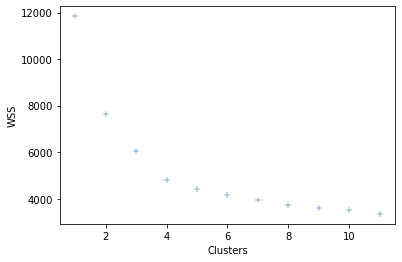

In [33]:
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

### Silhouette method for original dataset

In [34]:
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(train_org_X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(train_org_X, labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.2948364572525943
Silhouette score for k(clusters) = 4 is 0.29771664906617673
Silhouette score for k(clusters) = 5 is 0.2640017557035005
Silhouette score for k(clusters) = 6 is 0.2518854332411687
Silhouette score for k(clusters) = 7 is 0.20622607571104684
Silhouette score for k(clusters) = 8 is 0.19957095093629942
Silhouette score for k(clusters) = 9 is 0.18833881882541997
Silhouette score for k(clusters) = 10 is 0.19249496407274613
Silhouette score for k(clusters) = 11 is 0.2085103392233736
Silhouette score for k(clusters) = 12 is 0.19904195308864348


From the above the elbow we identify that 4 cluster  and silhouette method we observe the max silhouette as k = 4 . so we can conclude that k =4 is right cluster 

### Elbow method for low imbalanced dataset

In [35]:
#Elbow method for low_imbalance dataset

import sklearn.cluster as cluster
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(trainX)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [36]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,9307.304717
1,2,5781.815526
2,3,4503.045543
3,4,3826.021301
4,5,3427.354986
5,6,3188.678219
6,7,2999.575410
7,8,2857.170015
8,9,2712.776686
9,10,2624.334204


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

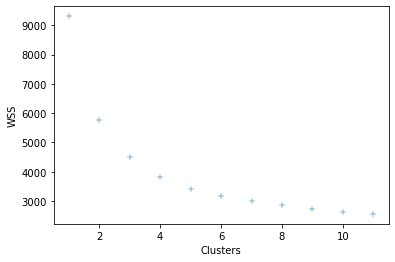

In [37]:
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

### Silhouette method for low lmbalance dataset

In [38]:
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(trainX).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(trainX, labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.32187202844310925
Silhouette score for k(clusters) = 4 is 0.3070018628745684
Silhouette score for k(clusters) = 5 is 0.2636861330218866
Silhouette score for k(clusters) = 6 is 0.25701723156342293
Silhouette score for k(clusters) = 7 is 0.24439282678438382
Silhouette score for k(clusters) = 8 is 0.23902716685356362
Silhouette score for k(clusters) = 9 is 0.23610309165299623
Silhouette score for k(clusters) = 10 is 0.1979099579624805
Silhouette score for k(clusters) = 11 is 0.20489374724502
Silhouette score for k(clusters) = 12 is 0.20783547144290343


From the above the elbow we identify that 4 cluster  and silhouette method we observe the max silhouette as k = 4 . so we can conclude that k =4 is right cluster 

### Elbow method for medium imbalanced dataset

In [39]:
#Elbow method for meduim dataset

import sklearn.cluster as cluster
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(trainA)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [40]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,7908.740040
1,2,5088.630338
2,3,4028.748644
3,4,3199.863618
4,5,2922.693732
5,6,2753.121733
6,7,2604.329866
7,8,2475.509000
8,9,2378.321624
9,10,2313.783193


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

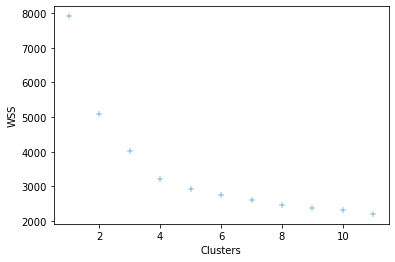

In [41]:
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

### Silhouette method for medium imbalance dataset

In [42]:
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(trainA).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(trainA, labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.29166203259475476
Silhouette score for k(clusters) = 4 is 0.310074937897881
Silhouette score for k(clusters) = 5 is 0.27348720157939227
Silhouette score for k(clusters) = 6 is 0.26334019613509546
Silhouette score for k(clusters) = 7 is 0.21209762112185804
Silhouette score for k(clusters) = 8 is 0.20893931395786708
Silhouette score for k(clusters) = 9 is 0.21226740272115216
Silhouette score for k(clusters) = 10 is 0.20973493810403937
Silhouette score for k(clusters) = 11 is 0.1937551129502189
Silhouette score for k(clusters) = 12 is 0.19954524832620643


From the above the elbow we identify that 4 cluster  and silhouette method we observe the max silhouette as k = 4 . so we can conclude that k =4 is right cluster 

### Elbow method for high imbalanced dataset

In [43]:
#Elbow method for high imbalace dataset

import sklearn.cluster as cluster
K=range(1,12)
wss = [] # within cluster sum of squares
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(trainC)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [44]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,6563.595050
1,2,4232.067321
2,3,3334.544506
3,4,2649.955481
4,5,2424.883224
5,6,2290.165054
6,7,2165.847124
7,8,2052.615668
8,9,1970.268468
9,10,1916.552826


<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

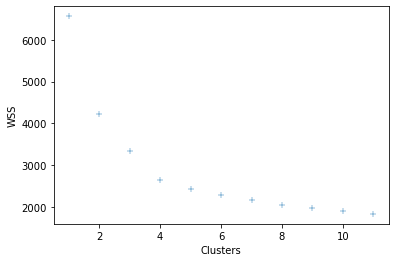

In [45]:
import seaborn as sns
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")

### Silhouette method for high imbalance dataset

In [46]:
import sklearn.metrics as metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(trainA).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(trainA, labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.29166203259475476
Silhouette score for k(clusters) = 4 is 0.310074937897881
Silhouette score for k(clusters) = 5 is 0.27348720157939227
Silhouette score for k(clusters) = 6 is 0.26334019613509546
Silhouette score for k(clusters) = 7 is 0.21209762112185804
Silhouette score for k(clusters) = 8 is 0.20893931395786708
Silhouette score for k(clusters) = 9 is 0.21226740272115216
Silhouette score for k(clusters) = 10 is 0.20973493810403937
Silhouette score for k(clusters) = 11 is 0.1937551129502189
Silhouette score for k(clusters) = 12 is 0.19954524832620643


From the above the elbow we identify that 4 cluster  and silhouette method we observe the max silhouette as k = 4 . so we can conclude that k =4 is right cluster 

### Running the kmean in the dataset with our identified cluster i.e k = 4

In [116]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init= 'k-means++', random_state=0)
k_mean_org=   kmeans.fit(train_org_X)
k_mean_low =  kmeans.fit(trainX)
k_mean_mid =  kmeans.fit(trainA)
k_mean_high = kmeans.fit(trainC)




# centroid_labels = [centroids[i] for i in k_mean_org]
# print(k_mean_org, k_mean_low, k_mean_mid, k_mean_high)



In [123]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_org_X)


In [126]:
kmeans.labels_

array([3, 0, 3, ..., 0, 0, 1])

In [138]:
import numpy as np
df1 = pd.DataFrame(kmeans.labels_) 
df1.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4496    0
4497    0
4498    0
4499    0
4500    0
Length: 4501, dtype: int64

In [55]:

# c=k_mean_mid.predict(testA)
# print(confusion_matrix(testB,c))
# print(accuracy_score(testB,c))
# print(classification_report(testB,c))

# d=k_mean_org.predict(testC)
# print(confusion_matrix(testD,d))
# print(accuracy_score(testD,d))
# print(classification_report(testD,d))


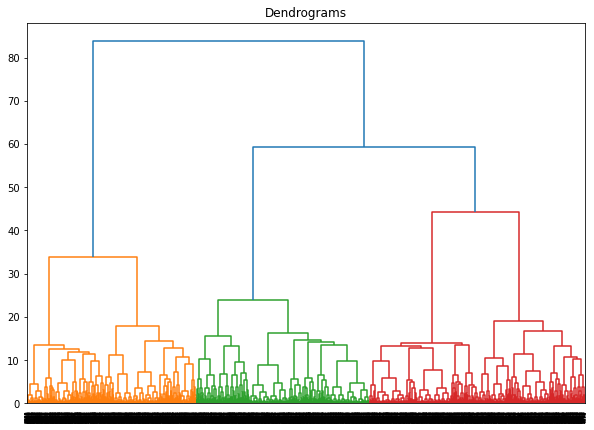

In [50]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(train_org_X, method='ward'))

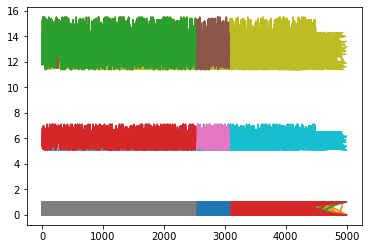

In [51]:
plt.plot(train_org_X)
plt.plot(trainX)
plt.plot(trainA)
plt.plot(trainC)
plt.show()

### Identifying the centriod

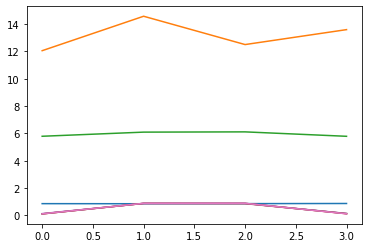

In [53]:
plt.plot(centroids)
plt.show()

In [113]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(train_org_X)
# Getting the cluster labels
labels = kmeans.predict(train_org_X)
# Centroid values
centroids = [np.mean(kmeans.cluster_centers_[i]) for i in range(len(centroids))]
print(centroids)
min(centroids)
print(kmeans.cluster_centers_)

[2.7420270102837314, 2.9706068268015167, 3.580822090530828, 3.2861092824226463]
[[ 0.86470078 12.05299219  5.7934085   0.11535126  0.13443192  0.11361665
   0.11968777]
 [ 0.87610619 13.59283186  5.79079646  0.12743363  0.14513274  0.13893805
   0.12300885]
 [ 0.85789938 14.57202118  6.0956752   0.88084731  0.88526037  0.88614298
   0.88790821]
 [ 0.86635945 12.50036866  6.11437788  0.88571429  0.88387097  0.86635945
   0.88571429]]


In [147]:
combine = pd.concat([train_org_X, train_org_Y], axis=1)
combine.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4498    0
4500    0
4503    0
4504    0
4505    0
Length: 4501, dtype: int64

In [163]:
df2 = pd.concat([combine, df1],  axis=1)
#df2.columns = df.columns.str.replace('0', 'new_char')
df2

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,0
0,1.0,11.8,6.1,1.0,0.0,1.0,1.0,1.0,3.0
1,0.0,14.0,5.4,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,11.8,6.3,1.0,1.0,1.0,1.0,1.0,3.0
3,0.0,14.4,6.1,0.0,1.0,1.0,1.0,1.0,2.0
4,1.0,13.5,5.9,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4500,1.0,12.0,6.2,0.0,0.0,0.0,0.0,0.0,1.0
4503,1.0,13.3,5.4,0.0,1.0,1.0,0.0,0.0,NaN
4504,0.0,13.5,5.9,0.0,0.0,0.0,0.0,0.0,NaN


In [159]:
#f1.head(20)

In [154]:
df2.isnull().sum(axis=0)

long_hair                    3
forehead_width_cm            3
forehead_height_cm           3
nose_wide                    3
nose_long                    3
lips_thin                    3
distance_nose_to_lip_long    3
gender                       3
0                            3
dtype: int64

In [167]:
# for i in range(len(centroids)):
#     a=df2(df2['0']==i.value_count(df2['gender'])
a = []
for i in range(len(df2)):
    if df2[0] == "0":
        a.append('zero')
        
a 

# a=combine['gender'].equals(df2['0'])
# a
    
                  
            

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
# import numpy as np
# from sklearn.cluster import KMeans
# from sklearn import datasets

# np.random.seed(0)


# # KMeans with 4 clusters
# clf =  KMeans(n_clusters=4)
# clf.fit(train_org_X)

# #Coordinates of cluster centers with shape [n_clusters, n_features]
# clf.cluster_centers_
# #Labels of each point
# clf.labels_

# # Nice Pythonic way to get the indices of the points for each corresponding cluster
# mydict = {i: np.where(clf.labels_ == i)[0] for i in range(clf.n_clusters)}

# # Transform this dictionary into list (if you need a list as result)
# dictlist = []
# for key, value in mydict.values():
#     temp = []
#     dictlist.append(temp)

    ### Getting the best number of cluster based on elblow method , where the difference between sum of squre distance is less then the 90% percentile.

In [ ]:
labels

In [ ]:
# x1= np.array(train_org_X)
# x2 = np.array(trainX)


# # create new plot and data
# plt.plot()
# X = np.array(list(zip(x1,x2))).reshape(len(x1), 15)
# colors = ['b', 'g', 'c']
# markers = ['o', 'v', 's']

# # KMeans algorithm 
# K = 4
# kmeans_model = KMeans(n_clusters=K).fit(X)

# print(kmeans_model.cluster_centers_)
# centers = np.array(kmeans_model.cluster_centers_)

# plt.plot()
# plt.title('k means centroids')

# for i, l in enumerate(kmeans_model.labels_):
#     plt.plot(train_org_X[i], color=colors[l], marker=markers[l],ls='None')
#     plt.xlim([0, 10])
#     plt.ylim([0, 10])

# plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
# plt.show()

In [ ]:
# plotting all the clusters and their Centroids
# x-axis : annual income 
# y-axis : spending score

# plt.figure(figsize=(8,8))
# plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
# plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
# plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
# plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# # plot the centroids
#   # cluster_centers_ndarray of shape (n_clusters, n_features) : Coordinates of cluster centers. 
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

# plt.title('Customer Groups')
# plt.xlabel('Annual Income')
# plt.ylabel('Spending Score')
# plt.show()

In [ ]:
# Sum_of_squared_distances = np.array(Sum_of_squared_distances)
# dif_scores = Sum_of_squared_distances / Sum_of_squared_distances[0]
# dif_scores = np.diff(dif_scores)
# n_clusters = np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
# print(n_clusters)

# preds = KMeans(n_clusters=n_clusters).fit_predict(df_dummies)
# print(f"First observation's cluster: {preds[0]}")

In [ ]:
# #Implementing the train-test split and hold-out cross validation with stratifield sampling
# train_org_X, test_org_X, train_org_Y, test_org_Y = train_test_split(features_df_dummies, labels_df_dummies, test_size=0.2, random_state=50, stratify=labels_df_dummies)
# trainX, testX, trainY, testY = train_test_split(features_low_imb, labels_low_imb, test_size=0.2, random_state=50, stratify=labels_low_imb) 
# trainA, testA, trainB, testB = train_test_split(features_mid_imb, labels_mid_imb, test_size=0.2, random_state=50, stratify=labels_mid_imb)
# trainC, testC, trainD, testD = train_test_split(features_high_imb, labels_high_imb, test_size=0.2, random_state=50, stratify=labels_high_imb)


In [ ]:
# train_df['gender'].value_counts()

In [ ]:
# test_df['gender'].value_counts()

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# #Elbow method for orginal dataset
# abc={'train_org_X':[],'train_org_Y':[]}
# y=[]    
# for train_org_X, train_org_Y in cv.split(df_dummies):
#     print('train_org_X: %s, train_org_Y: %s' % (train_org_X, train_org_Y))
#     abc.train_org_X=train_org_X
#     abc.train_org_Y=train_org_Y
#     y.append(abc)
    
# mms = MinMaxScaler()
# mms.fit(df_dummies)
# data_transformed = mms.transform(df_dummies)

# Sum_of_squared_distances = []
# K = range(1,20)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(data_transformed)
#     Sum_of_squared_distances.append(km.inertia_)

In [ ]:
# # random forest for imbalanced classification
# from numpy import mean
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# # generate dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# # define model
# model = RandomForestClassifier(n_estimators=10)
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate model
# scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# # summarize performance
# print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# from sklearn.metrics import f1_score
# from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# rf_clf = RandomForestClassifier(n_estimators=150, max_depth=6, random_state=50)
# from sklearn.metrics import make_scorer, confusion_matrix
# from sklearn.dummy import DummyRegressor, DummyClassifier
# dummy_clf = DummyClassifier(strategy='stratified')

# scores = cross_val_score(rf_clf, trainY, trainB, trainD, cv=10, scoring=make_scorer(f1_score))
# dummy_scores = cross_val_score(dummy_clf, train_df, cv=10, scoring=make_scorer(f1_score))

# print(f"F1 score: {scores.mean(), scores.std()}" )
# print(f"Dummy F1 score: {dummy_scores.mean(), dummy_scores.std()}")